## connectedComponents 라이브러리 사용

### 4-level gray scale로 양자화하지 않았을 때

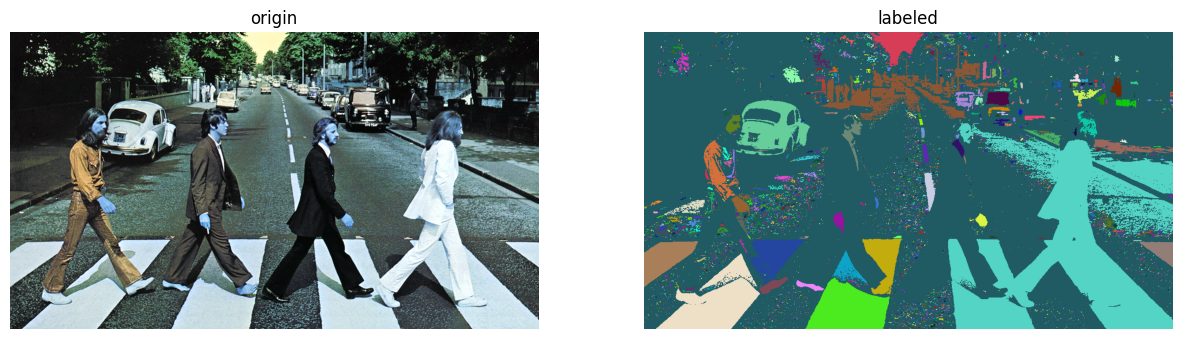

In [3]:
# 연결된 영역 레이블링 (connected_label.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('input.jpg')
# 결과 이미지 생성
img2 = np.zeros_like(img)
# 그레이 스케일과 바이너리 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용 ---①
cnt, labels = cv2.connectedComponents(th)
#retval, labels, stats, cent = cv2.connectedComponentsWithStats(th)

# 레이블 갯수 만큼 순회
for i in range(cnt):
    # 레이블이 같은 영역에 랜덤한 색상 적용 ---②
    img2[labels==i] =  [int(j) for j in np.random.randint(0,255, 3)]

# 결과 출력
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('origin')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('labeled')
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.show()

### 4-level gray scale 양자화

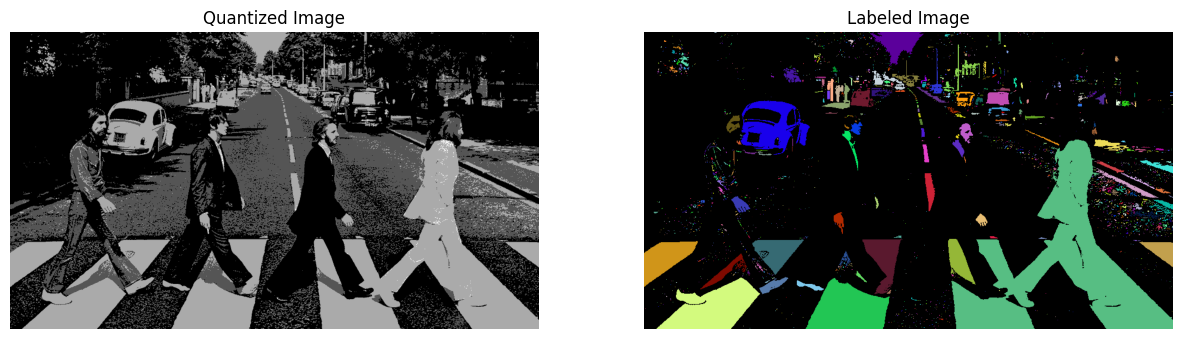

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 4-level 그레이스케일로 변환하는 함수
def quantize_image(image, levels=4):
    max_value = 255  # 최대 픽셀 값 (흑백 기준)
    step = max_value // (levels - 1)
    quantized_image = (image // step) * step
    return quantized_image

# 이미지 읽기
img = cv2.imread('input.jpg')
# 그레이 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4-level 그레이스케일 변환
quantized_gray = quantize_image(gray)

# 바이너리 스케일 변환
_, th = cv2.threshold(quantized_gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용
cnt, labels = cv2.connectedComponents(th)

# 결과 이미지 생성
img2 = np.zeros_like(img)

# 레이블 갯수 만큼 순회하여 각 영역에 색상 적용
for i in range(1, cnt):  # 0번 레이블은 배경이므로 제외
    img2[labels == i] = [int(j) for j in np.random.randint(0, 255, 3)]

# 결과 출력
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('Quantized Image')
plt.imshow(quantized_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Labeled Image')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

### 4-level gray scale image

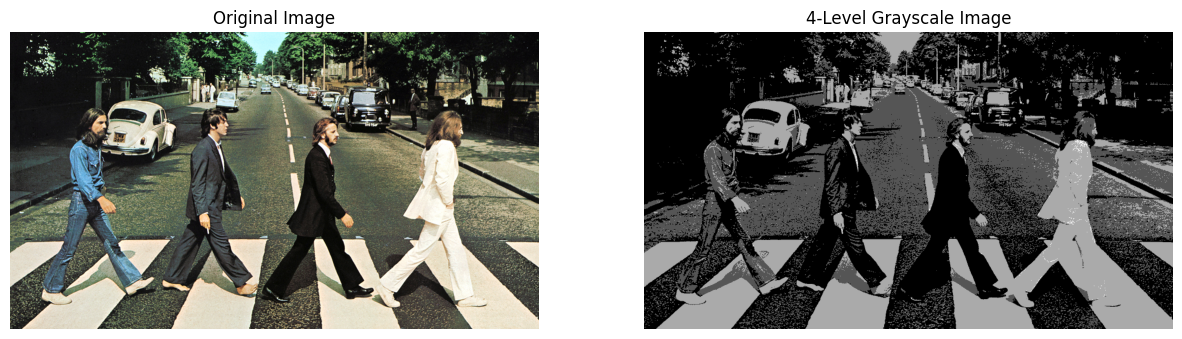

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 4-level 그레이스케일로 변환하는 함수
def quantize_image(image, levels=4):
    max_value = 255  # 최대 픽셀 값 (흑백 기준)
    step = max_value // (levels - 1) # 양자화 단계
    quantized_image = (image // step) * step # 각 단계로 매핑
    return quantized_image

# 이미지 읽기
img = cv2.imread('input.jpg')

# 그레이 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4-level 그레이스케일 변환
quantized_gray = quantize_image(gray)

# 이미지 출력
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('4-Level Grayscale Image')
plt.imshow(quantized_gray, cmap='gray') 
plt.axis('off') 

plt.show()

4-Level Grayscale Image saved as 'quantized_image2.jpg'


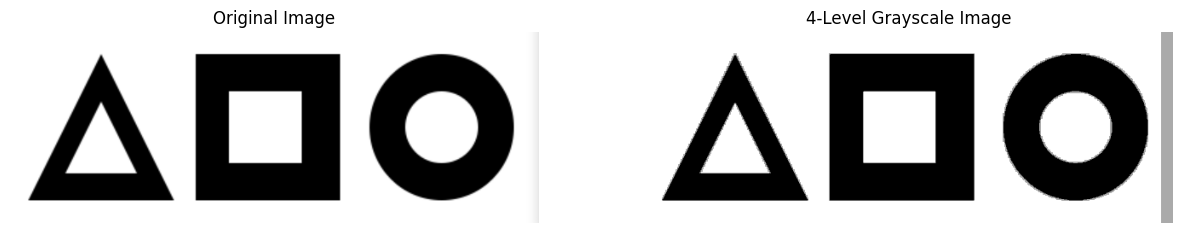

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 4-level 그레이스케일로 변환하는 함수
def quantize_image(image, levels=4):
    max_value = 255  # 최대 픽셀 값 (흑백 기준)
    step = max_value // (levels - 1)  # 양자화 단계
    quantized_image = (image // step) * step  # 각 단계로 매핑
    return quantized_image

# 이미지 읽기
img = cv2.imread('input.jpg')

# 그레이 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4-level 그레이스케일 변환
quantized_gray = quantize_image(gray)

# 4-level 그레이스케일 이미지 저장
output_filename = 'quantized_image2.jpg'
cv2.imwrite(output_filename, quantized_gray)
print(f"4-Level Grayscale Image saved as '{output_filename}'")

# 이미지 출력
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('4-Level Grayscale Image')
plt.imshow(quantized_gray, cmap='gray')
plt.axis('off')

plt.show()

## Flood-Fill and Connected Component Labeling

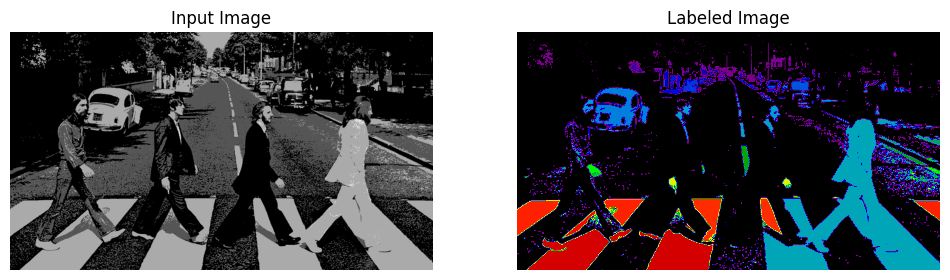

Number of connected components: 2456


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_connected_components(image):
    h, w = image.shape
    label = 0  # 시작 레이블
    table = np.where(image > 0, -1, 0)  # 전경은 -1로, 배경은 0으로 초기화
    stack = []  # 스택을 비어 있는 상태로 초기화
    
    for pos in range(h * w):
        if table.flat[pos] == -1:  # 전경인 경우
            label += 1  # 새 레이블 할당
            stack.append(pos)  # 스택 초기화
            
            while stack:
                adj = stack.pop()  # 스택에서 위치 추출
                xx = adj % w  # x 좌표
                yy = adj // w  # y 좌표
                
                if table.flat[adj] == -1:  # 아직 레이블이 지정되지 않은 전경일 경우
                    table.flat[adj] = label  # 레이블 지정
                    
                    # 4방향 연결 확인 (상하좌우)
                    if xx + 1 < w: stack.append(adj + 1)  # 오른쪽
                    if yy + 1 < h: stack.append(adj + w)  # 아래쪽
                    if yy > 0: stack.append(adj - w)  # 위쪽
                    if xx > 0: stack.append(adj - 1)  # 왼쪽
    
    return table, label  # 레이블 테이블과 총 레이블 수 반환

# 이미지 읽기
img = cv2.imread('quantized_image.jpg', cv2.IMREAD_GRAYSCALE)  # 4-level 양자화된 이미지 읽기

# 이진화 수행
_, th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 임계값 127로 이진화

# 연결된 구성 요소 찾기
labeled_image, num_labels = get_connected_components(th)

# 결과 출력
plt.figure(figsize=(12, 6))

# 이진화된 입력 이미지 출력
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

# 연결된 구성 요소 레이블링 결과 출력
plt.subplot(1, 2, 2)
plt.title('Labeled Image')
plt.imshow(labeled_image, cmap='nipy_spectral')  # 다양한 색상으로 표시
plt.axis('off')

plt.show()

print("Number of connected components:", num_labels)

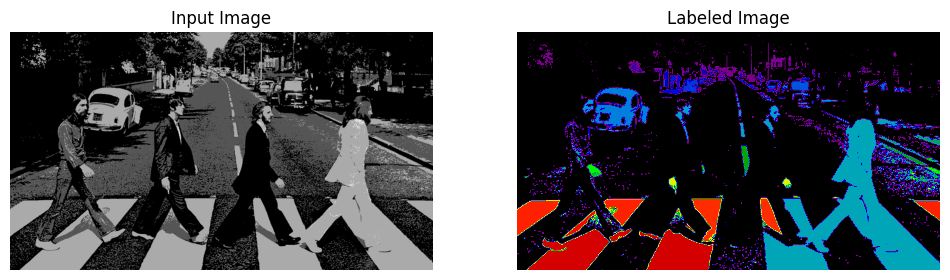

Number of connected components: 2456


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 4-level 그레이스케일로 변환하는 함수
def quantize_image(image, levels=4):
    max_value = 255  # 최대 픽셀 값 (흑백 기준)
    step = max_value // (levels - 1)
    quantized_image = (image // step) * step
    return quantized_image

def get_connected_components(image):
    h, w = image.shape
    label = 0  # 시작 레이블
    table = np.where(image > 0, -1, 0)  # 전경은 -1로, 배경은 0으로 초기화
    stack = []  # 스택을 비어 있는 상태로 초기화
    
    for pos in range(h * w):
        if table.flat[pos] == -1:  # 전경인 경우
            label += 1  # 새 레이블 할당
            stack.append(pos)  # 스택 초기화
            
            while stack:
                adj = stack.pop()  # 스택에서 위치 추출
                xx = adj % w  # x 좌표
                yy = adj // w  # y 좌표
                
                if table.flat[adj] == -1:  # 아직 레이블이 지정되지 않은 전경일 경우
                    table.flat[adj] = label  # 레이블 지정
                    
                    # 4방향 연결 확인 (상하좌우)
                    if xx + 1 < w: stack.append(adj + 1)  # 오른쪽
                    if yy + 1 < h: stack.append(adj + w)  # 아래쪽
                    if yy > 0: stack.append(adj - w)  # 위쪽
                    if xx > 0: stack.append(adj - 1)  # 왼쪽
    
    return table, label  # 레이블 테이블과 총 레이블 수 반환

# 메인 함수
if __name__ == "__main__":
    # 이미지 읽기
    img = cv2.imread('quantized_image.jpg', cv2.IMREAD_GRAYSCALE)  # 4-level 양자화된 이미지 읽기

    # 이진화 수행
    _, th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 임계값 127로 이진화

    # 연결된 구성 요소 찾기
    labeled_image, num_labels = get_connected_components(th)

    # 결과 출력
    plt.figure(figsize=(12, 6))

    # 이진화된 입력 이미지 출력
    plt.subplot(1, 2, 1)
    plt.title('Input Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # 연결된 구성 요소 레이블링 결과 출력
    plt.subplot(1, 2, 2)
    plt.title('Labeled Image')
    plt.imshow(labeled_image, cmap='nipy_spectral')  # 다양한 색상으로 표시
    plt.axis('off')

    plt.show()

    print("Number of connected components:", num_labels)

## Union-Find Connected Component Labeling

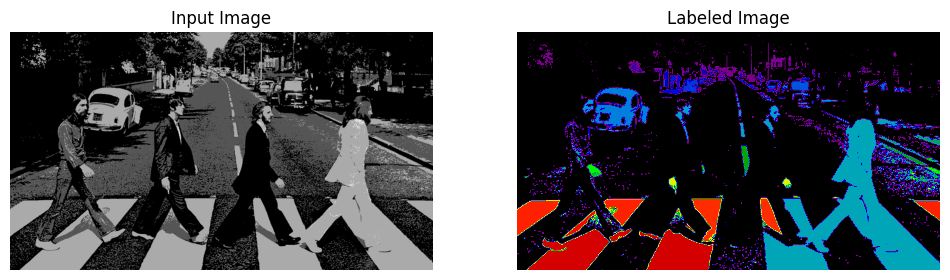

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Union-Find에서 노드 v가 속한 집합의 루트를 찾는 함수
def find(v, parent):
    if parent[v] != v:
        parent[v] = find(parent[v], parent)
    return parent[v]

# Union-Find에서 두 집합을 병합하는 함수
def union(a, b, parent):
    root_a = find(a, parent)
    root_b = find(b, parent)
    if root_a != root_b:
        parent[root_b] = root_a

# Union-Find 알고리즘을 활용한 Connected Component Labeling
def connected_component_label(image):
    h, w = image.shape
    labels = np.zeros((h, w), dtype=np.int32)  # 레이블 배열 초기화
    parent = [0]  # Union-Find 부모 배열, 0은 배경으로 사용
    next_label = 1  # 다음 레이블 번호

    # 첫 번째 패스: 레이블 할당 및 병합 수행
    for y in range(h):
        for x in range(w):
            if image[y, x] > 0:  # 전경(흰색) 픽셀일 경우
                neighbors = []

                # 위쪽 이웃 확인
                if y > 0 and labels[y - 1, x] > 0:
                    neighbors.append(labels[y - 1, x])

                # 왼쪽 이웃 확인
                if x > 0 and labels[y, x - 1] > 0:
                    neighbors.append(labels[y, x - 1])

                if not neighbors:  # 이웃이 없는 경우 새 레이블 할당
                    labels[y, x] = next_label
                    parent.append(next_label)  # 부모 배열에 새 레이블 추가
                    next_label += 1
                else:  # 이웃이 있는 경우, 가장 작은 레이블로 병합
                    min_label = min(neighbors)
                    labels[y, x] = min_label
                    for neighbor_label in neighbors:
                        union(min_label, neighbor_label, parent)

    # 두 번째 패스: 레이블 압축 및 최종 레이블링
    unique_labels = {}
    new_label = 1

    for y in range(h):
        for x in range(w):
            if labels[y, x] > 0:
                root = find(labels[y, x], parent)
                if root not in unique_labels:
                    unique_labels[root] = new_label
                    new_label += 1
                labels[y, x] = unique_labels[root]

    return labels, new_label - 1

# 메인 함수
if __name__ == "__main__":
    # 4-level 양자화된 이미지 읽기
    img = cv2.imread('quantized_image.jpg', cv2.IMREAD_GRAYSCALE)  # Grayscale로 읽기

    # 이진화 수행
    _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 임계값 127로 이진화

    # 연결 요소 레이블링 수행
    labeled_image, num_components = connected_component_label(binary_image)

    # 결과 출력
    plt.figure(figsize=(12, 6))

    # 이진화된 입력 이미지 출력
    plt.subplot(1, 2, 1)
    plt.title('Input Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # 레이블링된 이미지 출력
    plt.subplot(1, 2, 2)
    plt.title('Labeled Image')
    plt.imshow(labeled_image, cmap='nipy_spectral')
    plt.axis('off')

    plt.show()
